<a href="https://colab.research.google.com/github/Karina0162003/MLP_Programs/blob/main/BrainyBeamTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET: CREDIT CARD**

# **Data Preprocessing**

### **Load the Dataset**

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("/content/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [25]:
#print all the columns
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_mon_1', 'Naive_Bayes_mon_2'],
      dtype='object')

In [11]:
data.duplicated().sum()

0

In [13]:
# last two columns are very tall so I summarized its
data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'},inplace=True)

In [14]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [16]:
data.drop(columns=['CLIENTNUM'],inplace=True)

In [17]:
# Counting Null value from each column
filtered_data = data.isnull().sum()
print(filtered_data)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_mon_1           0
Naive_Bayes_mon_2           0
dtype: int64


# **PERFORM EDA (Exploratory Data Analysis)**

In [23]:
#summary of descriptive statistics for numerical columns in the DataFram
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [24]:
#to generate descriptive statistics specifically for object
data.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [86]:
# Drop irrelevant columns
df_clean = data.drop(columns=[
    'CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])


In [87]:
# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

In [88]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [90]:
# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

df_scaled.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.437506,-0.165406,1.059956,0.503368,-0.052637,-0.628128,-0.574182,-0.259473,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.437506,0.333570,-0.943436,2.043199,-0.597678,0.727306,0.755053,-0.259473,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.437506,0.583058,1.059956,0.503368,-0.597678,-0.628128,0.090436,-0.259473,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0.437506,-0.789126,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.259473,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0.437506,-0.789126,1.059956,0.503368,1.037447,-0.628128,-0.574182,-0.259473,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


**Existing Customer VS Attrited Customer**

<Axes: xlabel='Attrition_Flag', ylabel='count'>

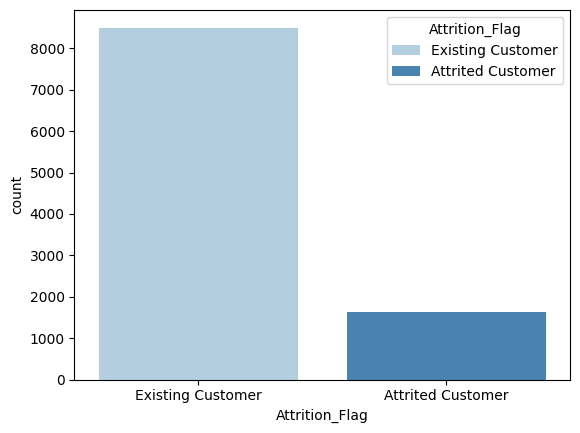

In [78]:
sns.countplot(x='Attrition_Flag', data=data, hue='Attrition_Flag', palette='Blues', legend=True)

**Age of customers**

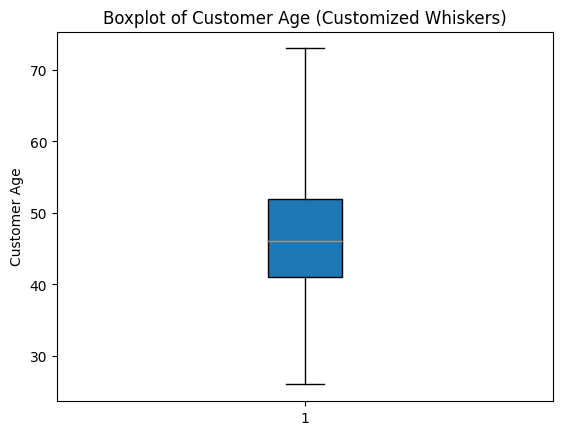

In [79]:
plt.boxplot(data['Customer_Age'], patch_artist=True, whis=2.0)  # Increasing whis to include values near 70
plt.title("Boxplot of Customer Age (Customized Whiskers)")
plt.ylabel("Customer Age")
plt.show()

**Distribution of the Total Transaction Amount (Last 12 months)**

In [80]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Box Plot',boxmean=True)
tr2=go.Histogram(x=data['Total_Trans_Amt'],name='Total_Trans_Amt Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of the Total Transaction Amount (Last 12 months)")
fig.show()

**Distribution of credit limit of customer**

<Axes: xlabel='Credit_Limit', ylabel='Count'>

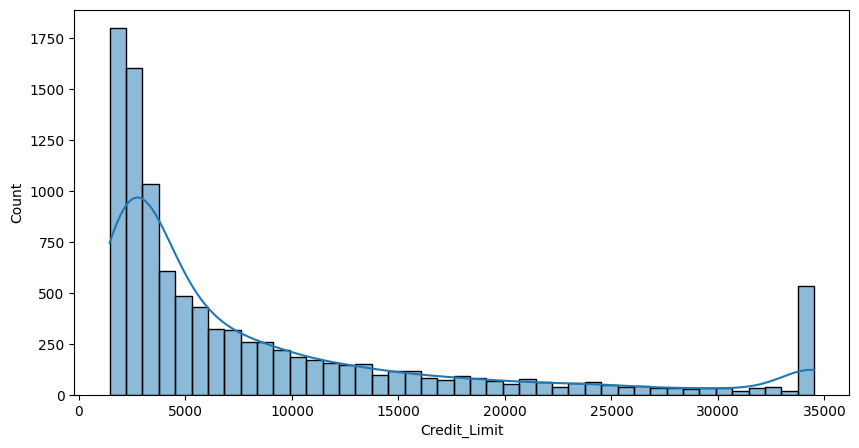

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(x='Credit_Limit',data=data,kde=True)

**Total transaction amount VS Total transaction count**

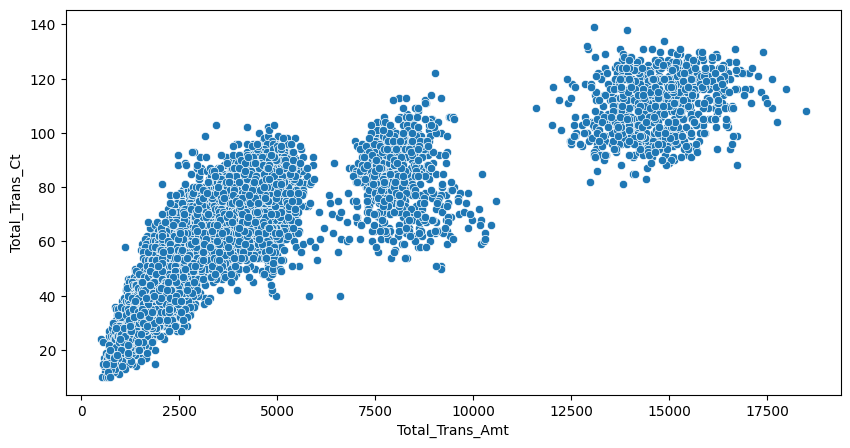

In [82]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=data);

# **Elbow Method and Silhouette Score**

## **Elbow Method**

In [110]:
sum_of_squared_distances = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

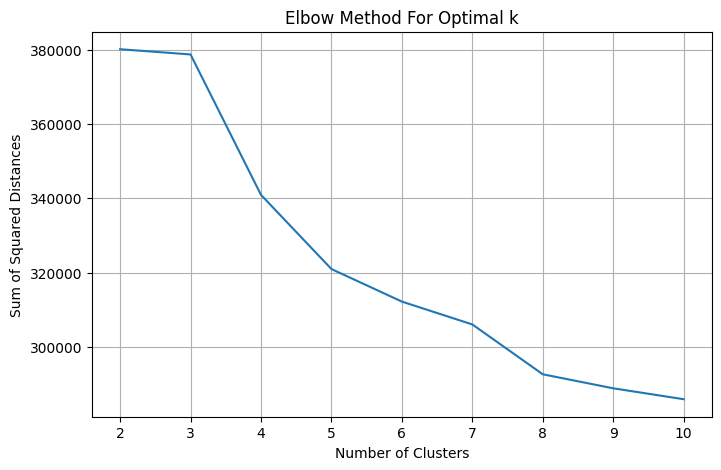

In [112]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# **Silhouette Score**

In [113]:
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)


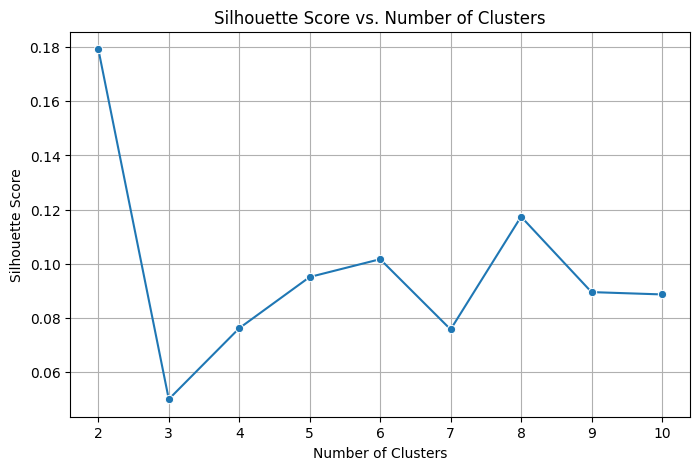

In [114]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
sns.lineplot(x=K, y=silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# **Performing K-Means Clustering**

In [116]:
# assuming the best number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

In [118]:
labels

array([2, 0, 2, ..., 0, 2, 0], dtype=int32)

In [120]:
# Add the cluster labels
df_clean['Cluster'] = labels

# **PCA for Dimensionality Reduction**

In [121]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [122]:
# Create a DataFrame PCA components amd clusters
df_pca_clustered = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_clustered['Cluster'] = labels

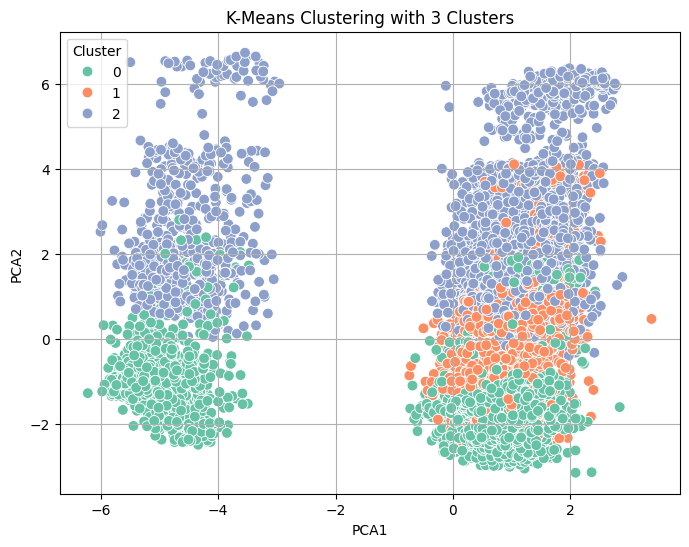

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca_clustered, palette='Set2', s=60)
plt.title(f'K-Means Clustering with 3 Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Evaluating the Clusters**

In [127]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[ 7.37932025e+08,  4.63943479e+01,  2.27456572e+00,
         3.59730360e+01,  3.78169562e+00,  2.40316308e+00,
         2.47731397e+00,  3.80058486e+03,  1.10646305e+03,
         2.69412180e+03,  7.45085299e-01,  4.14343894e+03,
         6.38050298e+01,  6.94640135e-01,  3.64576095e-01,
         2.46977382e-01,  7.53022553e-01,  2.48120301e-01,
         7.51879699e-01,  9.37775473e-01,  6.22245268e-02,
         9.51516723e-02,  4.64091263e-02,  3.15270936e-01,
         1.91340420e-01,  4.66683951e-02,  1.47783251e-01,
         1.57376199e-01,  7.18174747e-02,  4.57091003e-01,
         4.01866736e-01,  6.92247861e-02,  3.74700271e-15,
         4.58905885e-02,  6.24500451e-15, -9.43689571e-15,
         9.09774436e-01,  4.43349754e-02,  9.63443090e-01,
         5.70391496e-03,  1.03707545e-03,  2.98159191e-02],
       [ 7.39665898e+08,  4.60919395e+01,  2.27120067e+00,
         3.57665827e+01,  3.90806045e+00,  2.25944584e+00,
         2.34005038e+00,  6.80959123e+03,  1.24389253e+

In [137]:
df_clean.groupby('Cluster').mean()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.751944,46.389839,0.062468,2.273976,3.120529,1.468377,3.906687,0.097201,35.967600,3.781493,2.402799,2.477968,3800.817989,1106.176257,2694.641731,0.745052,4146.181182,63.813375,0.694630,0.364482
1,1.000000,46.091940,0.275399,2.271201,3.050378,1.457179,2.536524,0.117548,35.766583,3.908060,2.259446,2.340050,6809.591226,1243.892527,5565.698699,0.775280,4594.029387,69.250630,0.744769,0.307631
2,0.827631,46.405969,0.996141,2.463854,3.101106,1.462310,2.029586,0.299974,35.988680,3.784924,2.330075,2.503473,14543.810908,1169.343453,13374.467456,0.765318,4543.667867,63.204785,0.709739,0.165912


In [138]:
print(df_clean['Cluster'].value_counts())

Cluster
2    3887
0    3858
1    2382
Name: count, dtype: int64


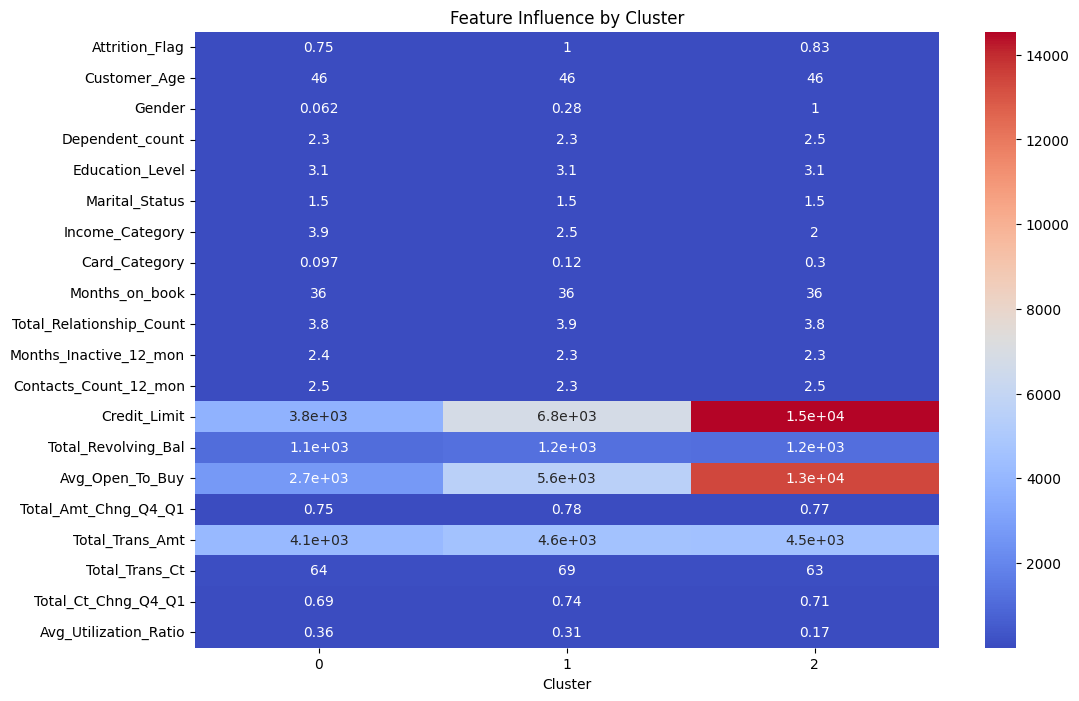

In [139]:
cluster_means = df_clean.groupby('Cluster').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='coolwarm', annot=True)
plt.title('Feature Influence by Cluster')
plt.show()